### 1. A partir du jeu de données original, créer:

    un Dataframe comportant tous les modules en précisant l’effectif des apprenants, le nombre total de sessions, le score
    maximal, le score minimal, le taux de réussite (pour les apprenants des scores > 50)
    
    un tableau 2D Numpy avec les données des 10 tops modules selon les taux de réussites (Chaque ligne représente un module)

### 2. Pour le top module et le dernier:

    créer un Dataframe avec les données résumées de chaque apprenants: nombre total de sessions, nombre total de temps, score,
    resultat final (de valeur 0 si score < 50 et 1 sinon)


In [1]:
import pandas as pd

In [2]:
scorm_tracking = pd.read_csv("C:/Users/Abdoulaye MAIGA/OneDrive/Bureau/Data/scorm_tracking_copy.csv",sep = ";")

In [3]:
#scorm_tracking.head()

In [4]:
scorm_tracking.shape

(27403, 13)

In [5]:
df_defaut = scorm_tracking[['object_id','actor','session_uuid','score','temps']]
df_defaut[:3]

,object_id,actor,session_uuid,score,temps
0,694-vorstellung,ga2018_umbe@yopmail.com,session-20,100.0,589.0
1,683-programme-nescens,dtic@mobiletic.com,session-33,0.0,6194.0
2,678-politique-et-cadre-legal,dtic@mobiletic.com,session-37,71.0,31203.0


In [6]:
effectif_par_modul = df_defaut.groupby(['object_id']).actor.nunique()
score_max = df_defaut.groupby(['object_id']).score.max()
score_min = df_defaut.groupby(['object_id']).score.min()
nb_t_de_session = df_defaut.groupby(['object_id']).session_uuid.nunique()
# effectif_par_modul

In [7]:
dfr = pd.DataFrame(effectif_par_modul)
#dfr

In [8]:
dfr['nb de session']=nb_t_de_session
dfr['score min']=score_min
dfr['score max']=score_max
# dfr

In [9]:
nb_score_50 = df_defaut[df_defaut['score'] >= 50]
#nb_score_50

In [10]:
nb_adm = nb_score_50.groupby(['object_id','actor']).score.max()
nb_admis = nb_adm.groupby(['object_id']).count()
dfr['Nombre admis'] = nb_admis
# nb_adm

In [11]:
dfr['Nombre admis'] = dfr['Nombre admis'].fillna(0)

In [12]:
taux_de_reussite = (dfr['Nombre admis']/dfr['actor'])*100

In [13]:
dfr['taux de reussite (%)'] = taux_de_reussite
# dfr.head(6)

In [14]:
dfr1 = dfr.sort_values(by=['taux de reussite (%)'],ascending=False)
#dfr1.head(40)

In [15]:
top_dfr = dfr1.head(10)
top_dfr[:3]

,actor,nb de session,score min,score max,Nombre admis,taux de reussite (%)
object_id,,,,,,
752-etudes-de-cas-et-questions,123,216,0.0,100.0,122.0,99.186992
734-risques-psychosociaux,124,153,0.0,100.0,122.0,98.387097
819-informatique,59,68,0.0,100.0,58.0,98.305085


In [16]:
#top_dfr.index

In [17]:
top_dfr.shape

(10, 6)

In [18]:
# tableau_top_10 = np.array([top_dfr])
# tableau_top_10
tableau_top_10 = top_dfr.to_numpy()
#tableau_top_10

# 2

In [19]:
#top_1 = dfr1.iloc[0,:]
top_1 = top_dfr.head(1)
# top_1

In [20]:
df_defaut = scorm_tracking[['object_id','actor','session_uuid','score','temps']]
top_1_info = df_defaut.loc[(df_defaut['object_id'] == top_1.index[0]),:]
#top_1_info.head(4)

In [21]:
nb_session = top_1_info.groupby(['actor']).session_uuid.count()
le_temps = top_1_info.groupby(['actor']).temps.sum()
le_score = top_1_info.groupby(['actor']).score.max()
# nb_session

In [22]:
resultatT1 = pd.DataFrame({'Nobre de session':nb_session})
resultatT1['Le temps'] = le_temps
resultatT1['Le score'] = le_score
resultatT1['Admis'] = 0

In [23]:
resultatT1.loc[resultatT1['Le score'] >= 50,'Admis'] = 1
#resultatT1.head()

## Pour le top dernier

In [24]:
top_dernier_info = df_defaut.loc[(df_defaut['object_id'] == dfr1.index[-1]),:]
top_dernier_info.head()

,object_id,actor,session_uuid,score,temps
1082,632-le-hibou-grand-duc,alexandre.comby@mobiletic.com,session-30955,0.0,0.0


In [25]:
nb_session0 = top_dernier_info.groupby(['actor']).session_uuid.count()
le_temps0 = top_dernier_info.groupby(['actor']).temps.sum()
le_score0 = top_dernier_info.groupby(['actor']).score.max()
resultatDernier = pd.DataFrame({'Nobre de session':nb_session0})
resultatDernier['Le temps'] = le_temps0
resultatDernier['Le score'] = le_score0
resultatDernier['Admis'] = 0

In [26]:
resultatDernier.loc[resultatDernier['Le score'] >= 50,'Admis'] = 1
resultatDernier

,Nobre de session,Le temps,Le score,Admis
actor,,,,
alexandre.comby@mobiletic.com,1,0.0,0.0,0


## Suite: Un clin d'oeil à Matplotlib

### Pour les 10 top module:
    représenter par une courbe ces derniers dans un même repère sur une figure unique. 
    A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. 
    L’ordonné est déterminé par son score maximum.
    Un diagramme en bâton avec le taux de réussite de chaque module. 

### Pour les 3 top module:
    représenter par une courbe chacun dans un même repère différent sur une même figure horizontalement subdivisée en trois.
    A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par son score
    maximum.

### Pour tous les modules:
    représenter l’ensemble par un nuage de points dans un même repère sur une même figure.
    A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci.
    L’ordonné est déterminé par le temps global sur le module.
    
    Un camembert avec le taux des modules catégorisés en quatre classes: 
    Classe A: taux de réussite > = 80%
    Classe B: taux de réussite > = 60%
    Classe C: taux de réussite > = 50%
    Classe D: taux de réussite < 50%


In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Pour les 10 top module:
    représenter par une courbe ces derniers dans un même repère sur une figure unique. 
    A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. 
    L’ordonné est déterminé par son score maximum.
    Un diagramme en bâton avec le taux de réussite de chaque module. 

In [28]:
liste1 = list(top_dfr.index)
df_defaut1 = df_defaut.set_index('object_id')
#df_defaut1.head()

In [29]:
def Courbe(data,liste):
    fig, axs = plt.subplots(figsize=(10,5), layout='constrained')
    i = 0
    for e in liste:
        top = data.loc[e,:]
        top_score = top.groupby(['actor']).score.max()
        top_temps = top.groupby(['actor']).temps.sum()
        topxy = pd.DataFrame({'Score':top_score,'Temps':top_temps})
        topxy['Temps'] = np.round(topxy['Temps']/60,3)
        top_xy = topxy.sort_values(by = 'Temps',ascending = False)  
        x = top_xy['Temps']
        y = top_xy['Score']      
        axs.plot(x,y, label = e)
    axs.legend() 
    axs.set_xlabel('LE TEMPS')
    axs.set_ylabel('LE SCORE');
        

In [30]:
#liste1 plt.xtiks(par)

In [31]:
#Courbe(df_defaut1 ,liste1)

In [32]:
#top_dfr

In [33]:
def Batton(data):
    liste = data.index
    fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')
    plt.xticks(rotation='-70')
    ax.bar(liste1,data['taux de reussite (%)']);

In [34]:
#Batton(top_dfr)

### Pour les 3 top module:
    représenter par une courbe chacun dans un même repère différent sur une même figure horizontalement subdivisée en trois.
    A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par son score
    maximum.


In [35]:
top_dfr_3 = top_dfr.head(3)
listeT3 = list(top_dfr_3.index)

In [36]:
def Courbe_top3(data,liste):
    fig, axs = plt.subplots(3,1,figsize=(8,10), layout='constrained')
    i = -1
    for e in liste:
        i = i+1
        top = data.loc[e,:]
        top_score = top.groupby(['actor']).score.max()
        topxy = pd.DataFrame({'Score':top_score})
        top_xy = topxy.sort_values(by = 'Score', ascending = False)
        top_xy['Rang'] = list(range(1,len(top_xy)+1))
        x = top_xy['Rang']
        y = top_xy['Score']
        axs[i].set_title(e)
        axs[i].set_xlim(0, 140)
        axs[i].set_ylim(0, 120)
        axs[i].plot(x,y)
        axs[i].set_xlabel('LE RANG')
        axs[i].set_ylabel('LE SCORE');  

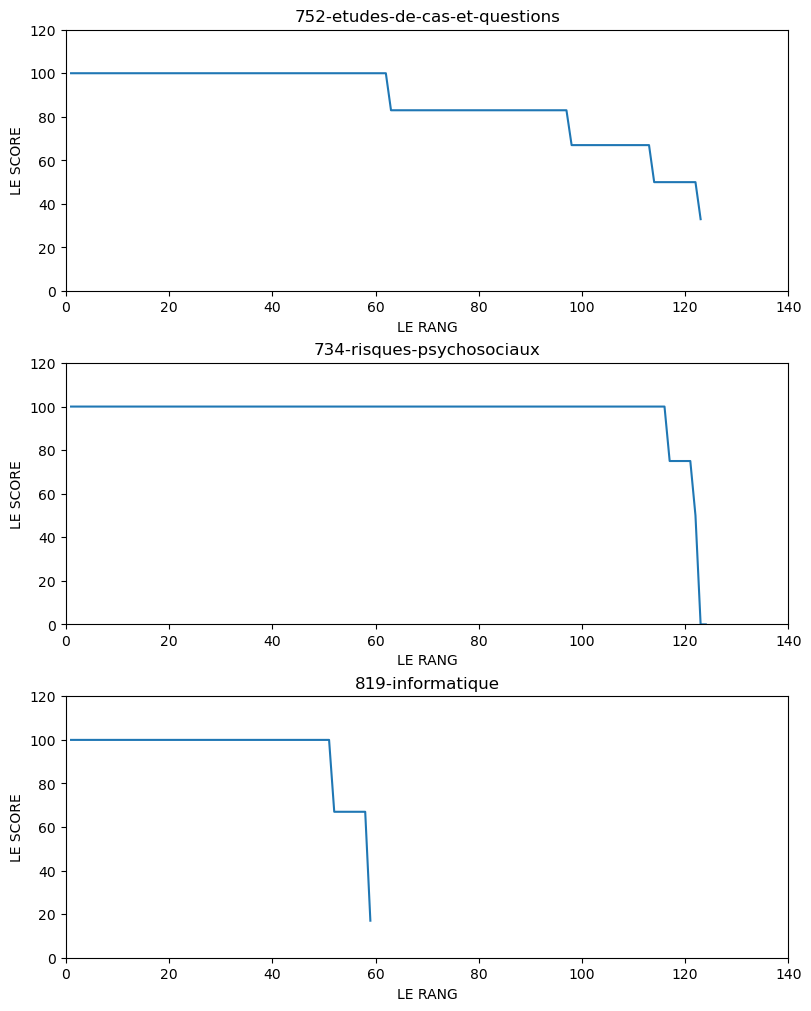

In [37]:
Courbe_top3(df_defaut1,listeT3)

### Pour tous les modules:
    représenter l’ensemble par un nuage de points dans un même repère sur une même figure.
    A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci.
    L’ordonné est déterminé par le temps global sur le module.
    
    Un camembert avec le taux des modules catégorisés en quatre classes: 
    Classe A: taux de réussite > = 80%
    Classe B: taux de réussite > = 60%
    Classe C: taux de réussite > = 50%
    Classe D: taux de réussite < 50%

In [38]:
#df_defaut1


In [39]:
listeModule = list(dfr.index)
# listeModule

In [40]:
#from pandas.errors import AttributeError

def NuagePoint(data,liste):
    l = []
    fig, axs = plt.subplots(figsize=(10,6), layout='constrained')
    for e in liste:
        top = data.loc[e,:]
        try :
            top_score = top.groupby(['actor']).score.max()
            top_temps = top.groupby(['actor']).temps.sum()
            top_temps = np.round(top_temps/60,3)
            topxy = pd.DataFrame({'Score':top_score,'Temps':top_temps})     
            top_xy = topxy.sort_values(by = 'Score',ascending = False) 
            top_xy['Rang'] = list(range(1,len(top_xy)+1))
            #top_xy['Rang'] = top_xy['Rang'].fillna(0)
            #top_xy['Temps'] = top_xy['Temps'].fillna(0)
            x = top_xy['Rang']
            y = top_xy['Temps']       
            axs.scatter(x,y, s = 50 )
            axs.set_xlabel('LE RANG')
            axs.set_ylabel('LE TEMPS');
        except AttributeError:
            l.append(e)
            continue
    return l


In [41]:
#df_defaut.object_id  dfr['Nombre admis'] = dfr['Nombre admis'].fillna(0)

In [42]:
#df_defaut1.index
#'632-le-hibou-grand-duc' in df_defaut1.index
#df_defaut1.loc['632-le-hibou-grand-duc',:]

In [43]:
#NuagePoint(df_defaut1,listeModule)


In [44]:
#top_dfr
#len([ e for e in dfr['taux de reussite (%)'] if((e < 80) & (e >= 60))])


In [45]:
def Secteur(data):
    score80 = len(data['taux de reussite (%)'] >= 80)
    score60 = len([ e for e in data['taux de reussite (%)'] if((e < 80) & (e >= 60))])
    score50 = len([ e for e in data['taux de reussite (%)'] if((e < 60) & (e >= 50))])
    score0  = len([ e for e in data['taux de reussite (%)'] if((e < 50))])
    l = [score80,score60,score50,score0]
    plt.figure(figsize = (10, 6), layout='constrained')
    plt.pie(l, labels = ['Taux de reussite sup_80','Taux de reussite [60,80]','Taux de reussite [50,60]',
                         'Taux de reussite [0,50]'], autopct='%1.2f%%')

In [46]:
#Secteur(dfr)

In [48]:
class AnalyseData :
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    
    def Courbe(data,liste):
        """Cette fonction permet de dessiner sur un même graphique la courbe de chaque module en fonction du temps
        et le score de chaque actore dans le module.
        -Ici la 'liste' contient les differents modules.
        -Et le 'data' est indicé sur les nom des modules."""
        import matplotlib.pyplot as plt
        import pandas as pd
        import numpy as np
        fig, axs = plt.subplots(figsize=(10,5), layout='constrained')
        i = 0
        for e in liste:               # ici pour chaque module 'e' choisi on fait le travail ci-dessous
            top = data.loc[e,:]      
            top_score = top.groupby(['actor']).score.max()
            top_temps = top.groupby(['actor']).temps.sum()
            topxy = pd.DataFrame({'Score':top_score,'Temps':top_temps})
            topxy['Temps'] = np.round(topxy['Temps']/60,3)             #Pour la conversion du temps en munite
            top_xy = topxy.sort_values(by = 'Temps',ascending = False)#on ordonnent en fonction du temps de manière décroissante
            x = top_xy['Temps']
            y = top_xy['Score']      
            axs.plot(x,y, label = e)
        axs.legend() 
        axs.set_xlabel('LE TEMPS')
        axs.set_ylabel('LE SCORE');
        
        
    def Batton(data):
        """Cette fonction nous fait une représentation en bâton sur un graphique pour chaque module en fonction du taux 
        de reussite dans ce module
        Ici on s’attendait que l’utilisateur entre un DataFrame dont les index sont les noms des modules"""
        import matplotlib.pyplot as plt
        liste = data.index
        fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')
        plt.xticks(rotation='-70')
        ax.bar(liste1,data['taux de reussite (%)']);
        
        
    def Courbe_top3(data,liste):
        """Cette fonction nous permet de faire un graphe sur lequel on a trois axes et sur chaque axe on fait une courbe 
        On a mit une liste en paramètre pour que l’utilisateur puis l’utilisé pour faire a sa guise ses choix entre
        les trois module qu’il veut.
        Enfait ici nous allons utilisé cette fonction pour faire les graphes des 3 premières ligne du DataFrame entré
        et chaque ligne est un module du data. """
        import matplotlib.pyplot as plt
        fig, axs = plt.subplots(3,1,figsize=(8,10), layout='constrained')
        i = -1
        for e in liste:
            i = i+1
            top = data.loc[e,:]
            top_score = top.groupby(['actor']).score.max()
            topxy = pd.DataFrame({'Score':top_score})
            top_xy = topxy.sort_values(by = 'Score', ascending = False)
            top_xy['Rang'] = list(range(1,len(top_xy)+1))
            x = top_xy['Rang']
            y = top_xy['Score']
            axs[i].set_title(e)
            axs[i].set_xlim(0, 140)
            axs[i].set_ylim(0, 120)
            axs[i].plot(x,y)
            axs[i].set_xlabel('LE RANG')
            axs[i].set_ylabel('LE SCORE');  
            
            
    def NuagePoint(data,liste):
        """Nuage des points """
        l = []
        fig, axs = plt.subplots(figsize=(10,6), layout='constrained')
        for e in liste:
            top = data.loc[e,:]
            try :
                top_score = top.groupby(['actor']).score.max()
                top_temps = top.groupby(['actor']).temps.sum()
                top_temps = np.round(top_temps/60,3)
                topxy = pd.DataFrame({'Score':top_score,'Temps':top_temps})     
                top_xy = topxy.sort_values(by = 'Score',ascending = False) 
                top_xy['Rang'] = list(range(1,len(top_xy)+1))
                #top_xy['Rang'] = top_xy['Rang'].fillna(0)
                #top_xy['Temps'] = top_xy['Temps'].fillna(0)
                x = top_xy['Rang']
                y = top_xy['Temps']       
                axs.scatter(x,y, s = 50 )
                axs.set_xlabel('LE RANG')
                axs.set_ylabel('LE TEMPS');
            except AttributeError:
                l.append(e)
                continue
        return l

            
    def Secteur(data):
        """Representation par un camenbert"""
        score80 = len(data['taux de reussite (%)'] >= 80)
        score60 = len([ e for e in data['taux de reussite (%)'] if((e < 80) & (e >= 60))])
        score50 = len([ e for e in data['taux de reussite (%)'] if((e < 60) & (e >= 50))])
        score0  = len([ e for e in data['taux de reussite (%)'] if((e < 50))])
        l = [score80,score60,score50,score0]
        plt.figure(figsize = (10, 6), layout='constrained')
        plt.pie(l, labels = ['Taux de reussite sup_80','Taux de reussite [60,80]','Taux de reussite [50,60]',
                             'Taux de reussite [0,50]'],autopct='%1.2f%%')
  


    def top_data(df,df1):
        """Les differents travails"""
        import pandas as pd
        effectif_par_modul = df1.groupby(['object_id']).actor.nunique()
        score_max = df1.groupby(['object_id']).score.max()
        score_min = df1.groupby(['object_id']).score.min()
        nb_t_de_session = df1.groupby(['object_id']).session_uuid.nunique()
        dfr = pd.DataFrame(effectif_par_modul)
        dfr['nb de session']=nb_t_de_session
        dfr['score min']=score_min
        dfr['score max']=score_max
        nb_score_50 = df1[df1['score'] >= 50]
        nb_adm = nb_score_50.groupby(['object_id','actor']).score.max()
        nb_admis = nb_adm.groupby(['object_id']).count()
        dfr['Nombre admis'] = nb_admis
        dfr['Nombre admis'] = dfr['Nombre admis'].fillna(0)
        taux_de_reussite = (dfr['Nombre admis']/dfr['actor'])*100
        dfr['taux de reussite (%)'] = taux_de_reussite
        dfr1 = dfr.sort_values(by=['taux de reussite (%)'],ascending=False)      #Tous les top par ordre d’excelence
        top_dfr = dfr1.head(10)                                                 # les 10 top des mdules
        print("Voilà les données des 10 tops modules")
        print(top_dfr)
        oui = input("Voulez-vous avoir un tableau numpy de ces données ? (Oui/Non) :")
        if oui == 'Oui' or oui =='oui':
            tableau_top_10 = top_dfr.to_numpy()
            print(tableau_top_10)
        else :
            print("Merci !")
        ok = input("Voulez-vous avoir des information sur les données de un des top 10 ? (Oui/Non) :")
        if ok == 'Oui' or ok == 'oui':
            print("Choisir 1 pour le top 1 \n")
            print("Choisir 2 pour le top 2 \n")
            print("Choisir i pour le top i 1 <= i <= 10 \n")
            print("Choisir 10 pour le top 10 \n")
            try :
                info_top = int(input("Donnez votre choix :"))
            except :
                print("Un entier s’il vous plait \n")
                info_top = int(input("Donnez votre choix :")) 
            top_1_info = df.loc[(df['object_id'] == top_dfr.index[info_top-1]),:]
            nb_session = top_1_info.groupby(['actor']).session_uuid.count()
            le_temps = top_1_info.groupby(['actor']).temps.sum()
            le_score = top_1_info.groupby(['actor']).score.max()
            resultatT1 = pd.DataFrame({'Nobre de session':nb_session})
            resultatT1['Le temps'] = le_temps
            resultatT1['Le score'] = le_score
            resultatT1['Admis'] = 0
            resultatT1.loc[resultatT1['Le score'] >= 50,'Admis'] = 1
            print(resultatT1)                                                  # information sur un top module
        else :
            print("Merci !")
        bon = input("Voulez-vous avoir des information sur les données du top module dernier ? (Oui/Non) :")
        if bon == 'Oui' or bon =='oui':
            top_dernier_info = df.loc[(df['object_id'] == dfr1.index[-1]),:]
            nb_session0 = top_dernier_info.groupby(['actor']).session_uuid.count()
            le_temps0 = top_dernier_info.groupby(['actor']).temps.sum()
            le_score0 = top_dernier_info.groupby(['actor']).score.max()
            resultatDernier = pd.DataFrame({'Nobre de session':nb_session0})
            resultatDernier['Le temps'] = le_temps0
            resultatDernier['Le score'] = le_score0
            resultatDernier['Admis'] = 0
            resultatDernier.loc[resultatDernier['Le score'] >= 50,'Admis'] = 1
            print(resultatDernier)                                              # information sur le top module dernier
        else :
            print("Merci !")
        liste = list(top_dfr.index)
        courbe = input("Voulez-vous une courbe des données du data en fonction du temps et du scores ? (Oui/Non) :")
        if courbe == 'Oui' or courbe =='oui':
            df2 = df1.set_index('object_id')
            AnalyseData.Courbe(df2,liste)                                    # la courbe des données
        else :
             print("Merci !")
        baton = input("Voulez-vous Un diagramme en bâton avec le taux de réussite de chaque module ? (Oui/Non) :")
        if baton == 'Oui' or baton =='oui':
            AnalyseData.Batton(top_dfr)                                       # Le diagramme en baton de 10 top premier
        else :
            print("Merci ! ")
        listeT3 = list(top_dfr[:3].index)
        courbe3 = input("Voulez-vous Une courbe de 3 premier top module ? (Oui/Non) :")
        if courbe3 == 'Oui' or courbe3 =='oui':
            AnalyseData.Courbe_top3(df2,listeT3)                              # Courbe de 3 premiers top
        else :
            print("Merci !")
        listeModule = list(dfr1.index)
        nuage = input("Voulez-vous le graphe de nuage des points de tous les module ? (Oui/Non) :")
        if nuage == 'Oui' or nuage =='oui':
            AnalyseData.NuagePoint(df2,listeModule)                          # le nuage des points de tous les modules
        else :
            print("Merci !")
        secteur = input("Voulez-vous Un camembert avec le taux des modules catégorisés en quatre classes  ? (Oui/Non) :")
        if secteur == 'Oui' or secteur =='oui':
            AnalyseData.Secteur(dfr)
        else :
            print("Merci !")


 
    def fonction_analyseData():
        print("Salut ! Je suis là pour vous facilité votre travail \n")
        chemin = str(input(print("Donnée le chemin complet de votre data(Votre fichier csv) : \n")))
        import pandas as pd
        try :
            df = pd.read_csv(chemin,sep = ';')
        except :
            df = pd.read_csv(chemin,sep = ',')
        df1 = df[['object_id','actor','session_uuid','score','temps']]
        df2 = df1.set_index('object_id')
        print("Que voullez-vous savoir de ce données ? :\n")
        print("1 pour afficher le deux premiere lignes du data :\n")
        print("2 Pour une analyse des données du tableau :\n")
        try:
            choix = int(input("Donnez votre choix : "))
        except :
            choix = int(input("Donnez votre choix : "))
        print()
        if choix == 1:
            print(df[:2])
        elif choix == 2:
            AnalyseData.top_data(df,df1)
        #elif choix == 2:
         #   AnalyseData.top1_info(df,)
            

In [50]:
#AnalyseData.fonction_analyseData()

In [ ]:
C:/Users/Abdoulaye MAIGA/OneDrive/Bureau/Data/scorm_tracking_copy.csv